In [1]:
import numpy as np
import pandas as pd
from math import ceil

from sklearn.decomposition import PCA

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects  as PathEffects
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D 
sns.set(style="white")
       
font = {'size'   : 8}

matplotlib.rc('font', **font)

from emocoder.src import data

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/truetype/dejavu/DejaVuSansMono-BoldOblique.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuMathTeXGyre.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-BoldItalic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-BoldOblique.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Oblique.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Oblique.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-BoldOblique.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-Oblique.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSeri

In [3]:
prop = matplotlib.font_manager.FontProperties('/System/Library/Fonts/PingFang.ttc')

In [4]:
acl_columnwidth_in_inch = 7.7 / 2.54

## Analysis of Prediction Head Embeddings

In [5]:
heads = pd.read_csv("prediction_head_embeddings.csv", index_col=0)
heads

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
val_vad,-0.005303,0.063241,0.020932,0.035279,-0.000653,0.016971,0.024072,0.162558,0.004854,0.004981,...,-0.003943,0.007858,0.017405,-0.128084,0.003735,0.035191,0.155555,0.000243,-0.005816,0.011249
aro_vad,0.000585,-0.016460,0.002861,0.015617,0.004061,-0.005898,0.067343,-0.010359,0.019438,0.015894,...,0.001681,0.000392,-0.004670,0.074307,-0.002950,-0.143584,-0.016074,0.004600,0.002930,0.005883
dom_vad,0.094692,-0.069519,0.178831,-0.057414,0.014764,-0.021627,-0.108467,0.178263,-0.051849,-0.042581,...,0.014706,-0.047629,0.022007,0.072690,0.008462,0.075383,-0.015058,-0.006223,0.015614,-0.030450
val_va,-0.004529,0.062597,0.020056,0.034001,0.000203,0.018429,0.024750,0.161652,0.006827,0.002183,...,-0.002319,0.005008,0.018239,-0.127617,0.003474,0.035820,0.155200,-0.001558,-0.005362,0.011465
aro_va,-0.002832,-0.013426,0.003082,0.017446,0.001611,-0.002553,0.062242,-0.013371,0.021363,0.010970,...,0.002562,0.000848,-0.008120,0.075044,-0.003490,-0.138782,-0.017712,0.002575,0.001912,0.002692
joy_be5,0.009520,0.076064,0.040584,0.098227,0.035246,-0.047260,-0.055135,0.083091,0.116876,-0.063598,...,0.028783,-0.035054,-0.095511,-0.073292,-0.061231,0.003961,0.085343,0.049052,0.015246,-0.006175
ang_be5,-0.026745,0.077720,0.006560,0.013593,-0.061989,0.149438,-0.026858,-0.050917,0.042302,-0.074143,...,-0.027753,0.000024,-0.021881,0.048464,0.009874,0.087785,-0.014765,0.000406,-0.014525,0.044572
sad_be5,-0.057414,0.037263,-0.012843,-0.115220,-0.009606,-0.063873,-0.018040,-0.027256,0.067196,-0.080382,...,-0.102491,0.058216,-0.045397,0.033448,-0.008105,-0.108871,-0.051466,-0.003286,-0.103245,-0.070205
fea_be5,-0.050322,-0.019975,-0.027884,-0.015025,-0.008721,0.074102,-0.046230,-0.046052,0.006302,0.031548,...,0.037675,0.004950,-0.052285,0.054392,0.033649,-0.050374,-0.028003,-0.038167,-0.084617,-0.025127
dis_be5,-0.015739,-0.081496,-0.080598,0.135192,-0.065156,-0.116534,-0.083212,0.009309,-0.087686,-0.022009,...,0.097386,-0.058429,-0.058151,0.004923,0.069830,0.049888,-0.062415,-0.025719,0.072532,-0.131628


In [6]:
def normalize(x):
    
    if isinstance(x, pd.DataFrame):
        norms = np.sqrt((x**2).sum(axis=1))
    elif isinstance(x,pd.Series):
        norms = np.sqrt((x**2).sum())
    else:
        raise ValueError("Invalid input data type")
    
    x = x.divide(norms, axis=0)
    return x

In [7]:
heads_normalized = normalize(heads)

In [8]:
# sanity check to see if all heads have unit length
np.sqrt((heads_normalized**2).sum(axis=1))

val_vad         1.0
aro_vad         1.0
dom_vad         1.0
val_va          1.0
aro_va          1.0
joy_be5         1.0
ang_be5         1.0
sad_be5         1.0
fea_be5         1.0
dis_be5         1.0
anger_fer       1.0
disgust_fer     1.0
fear_fer        1.0
happy_fer       1.0
sad_fer         1.0
surprise_fer    1.0
neutral_fer     1.0
neutral_an      1.0
happy_an        1.0
sad_an          1.0
surprise_an     1.0
fear_an         1.0
disgust_an      1.0
anger_an        1.0
contempt_an     1.0
dtype: float64

In [9]:
pca2d = PCA(n_components=2)
pca2d.fit_transform(heads_normalized)

def pca(x):
    if isinstance(x, pd.DataFrame):
        rt = pca2d.transform(x)
        rt = pd.DataFrame(rt, index=x.index)
    elif isinstance(x, pd.Series):
        rt = np.expand_dims(x, axis=0)
        rt = pca2d.transform(rt)
        rt = pd.Series(data=np.squeeze(rt), name=x.name)
        
    else:
        raise ValueError("Invalid input data type")
    return rt

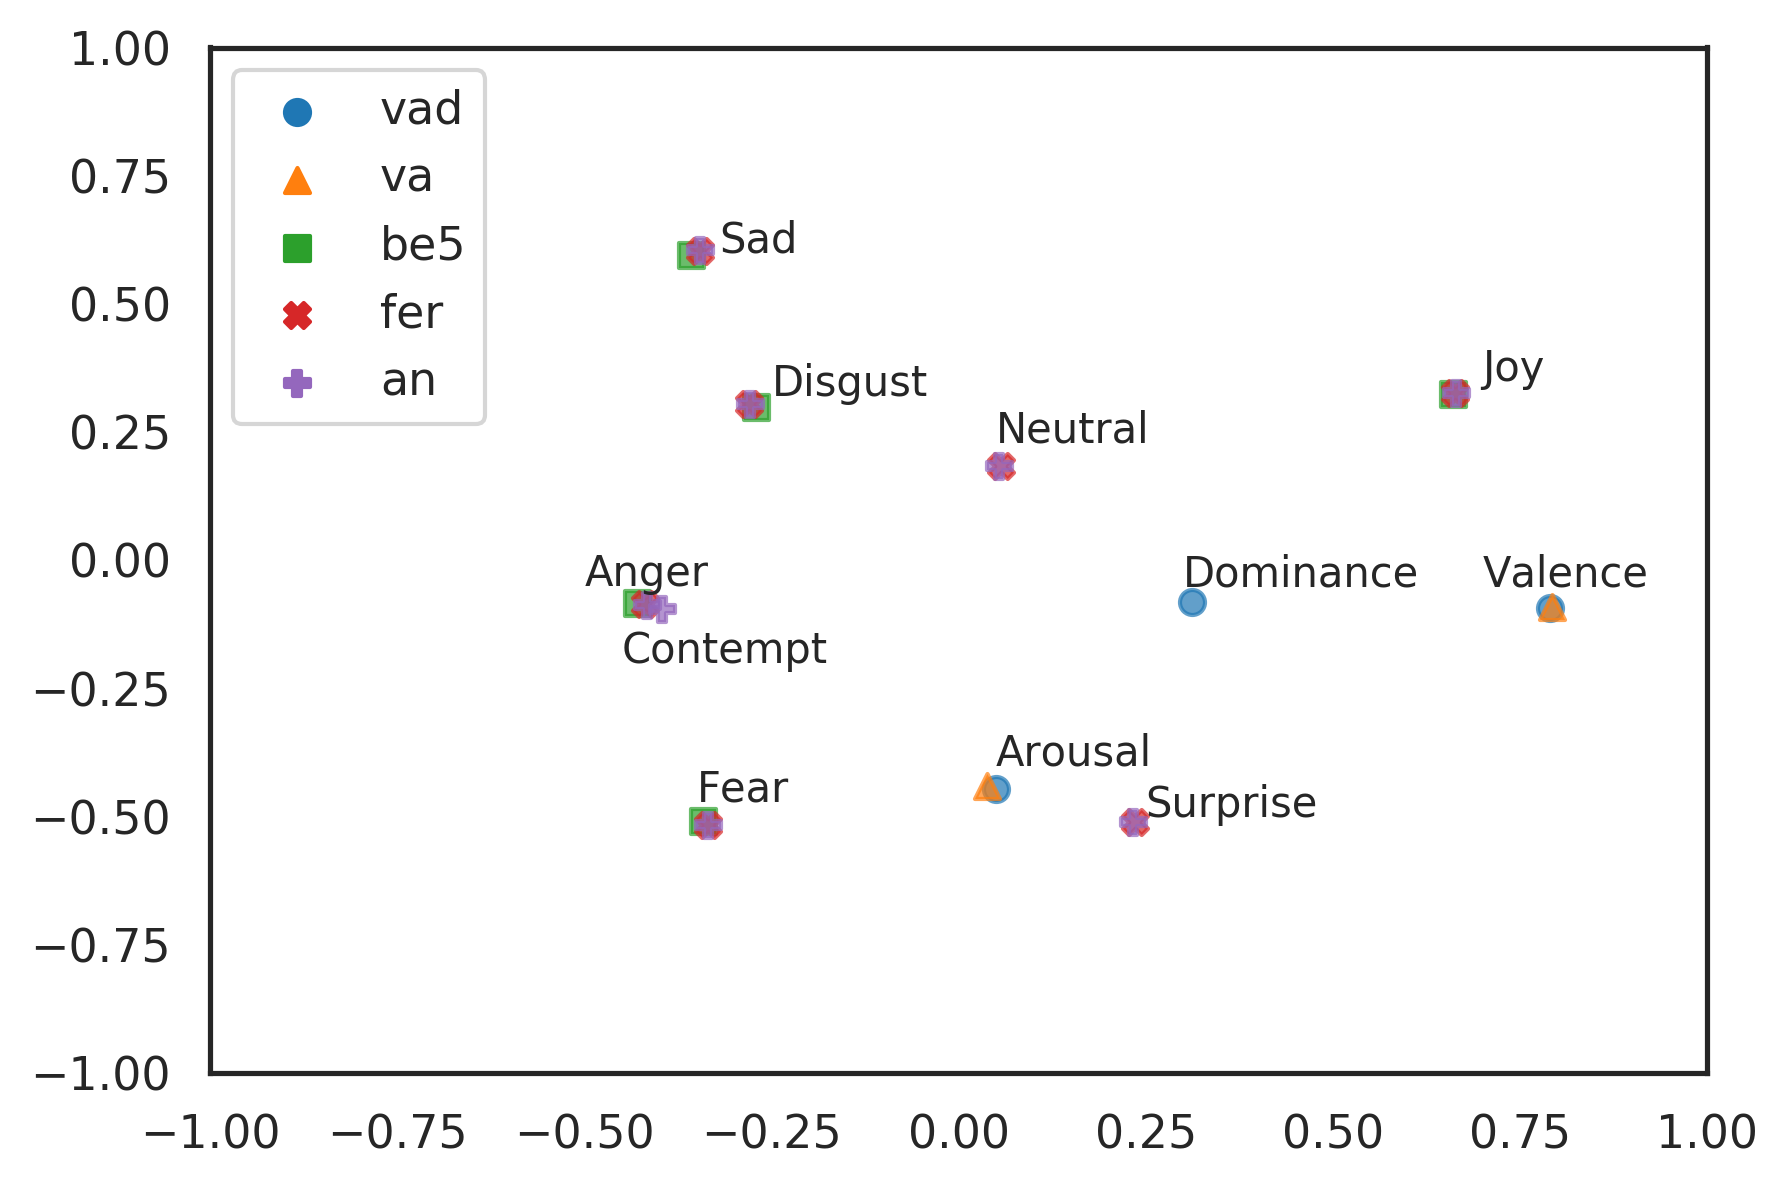

In [95]:

# Basic config



fig, ax = plt.subplots(dpi=300)

ax.set_ylim((-1, 1))
ax.set_xlim((-1, 1))
#ax.grid()

parameterset2marker = {
    "vad": ("o", "tab:blue"),
    "va": ("^", "tab:orange"),
    "be5": ("s", "tab:green"),
    "fer": ("X", "tab:red"),
    "an": ("P", "tab:purple")
}

fontsize = 10

# -------------

heads_2d = pca(heads_normalized)

markers = []
for vname in heads_2d.index:
    
    #ax.text(x=rt[i,0]+.03, y=rt[i,1]+.03, s=test_subset.index[i])
    
    x,y = heads_2d.loc[vname]
    parameterset = vname.split("_")[-1]
    marker,color = parameterset2marker[parameterset]
    
    ax.scatter(x=x, y=y, marker=marker, color=color, alpha=.7)
    
    
    # Actual position
    # ax.text(x=x, y=y, s=vname)
    

# Annotation positions
ax.text(x=.70, y=-0.05, s="Valence", fontsize=fontsize)
ax.text(x=.7, y=.35, s="Joy", fontsize=fontsize)
ax.text(x=.25, y=-0.50, s="Surprise", fontsize=fontsize)
ax.text(x=.30, y=-0.05, s="Dominance", fontsize=fontsize)
ax.text(x=0.05, y=0.23, s="Neutral", fontsize=fontsize)
ax.text(x=+0.05, y=-0.40, s="Arousal", fontsize=fontsize)
ax.text(x=-.35, y=-0.47, s="Fear", fontsize=fontsize)
ax.text(x=-.32, y=.60, s="Sad", fontsize=fontsize)
ax.text(x=-.45, y=-.20, s="Contempt", fontsize=fontsize)
ax.text(x=-0.50, y=-0.05, s="Anger", fontsize=fontsize)
ax.text(x=-.25, y=+0.32, s="Disgust", fontsize=fontsize)



# legend
marker_vad = ax.scatter(99,99, marker=parameterset2marker["vad"][0],
                        color=parameterset2marker["vad"][1])
marker_va = ax.scatter(99,99, marker=parameterset2marker["va"][0],
                       color=parameterset2marker["va"][1])
marker_be5 = ax.scatter(99,99, marker=parameterset2marker["be5"][0],
                        color=parameterset2marker["be5"][1])
marker_fer = ax.scatter(99,99, marker=parameterset2marker["fer"][0],
                        color=parameterset2marker["fer"][1])
marker_an = ax.scatter(99,99, marker=parameterset2marker["an"][0],
                       color=parameterset2marker["an"][1])

handles = [marker_vad, marker_va, marker_be5, marker_fer, marker_an]
labels = ["vad", "va", "be5", "fer", "an"]
ax.legend(handles=handles, labels=labels, loc="upper left")


fig.tight_layout()
fig.savefig("emotion-variables.pdf")

## Analysis of Sample Embeddings

In [11]:
words_en = pd.read_csv("word_emotion_embeddings_en.csv", index_col=0)
words_es = pd.read_csv("word_emotion_embeddings_es.csv", index_col=0)
words_de = pd.read_csv("word_emotion_embeddings_de.csv", index_col=0)
words_pl = pd.read_csv("word_emotion_embeddings_pl.csv", index_col=0)
words_tr = pd.read_csv("word_emotion_embeddings_tr.csv", index_col=0)

texts_emobank = pd.read_csv("text_emotion_embeddings_emobank.csv", index_col=0)
texts_afftext = pd.read_csv("text_emotion_embeddings_afftext.csv", index_col=0)
texts_sst = pd.read_csv("text_emotion_embeddings_sst.csv", index_col=0)
texts_cvat = pd.read_csv("text_emotion_embeddings_cvat.csv", index_col=0)

images_fer = pd.read_csv("image_emotion_embeddings_fer.csv", index_col=0)
images_affnet = pd.read_csv("image_emotion_embeddings_affectnet.csv", index_col=0)

In [12]:
ds_fer = data.images.FER2013("dev", transform=None)
ds_an = data.images.AffectNet2019_BE("dev", transform=None)

# creating a map id -> index, because I access samples in the dataset only by index, but the embeddings df only
#   holds their ID
id2index_fer = {sample["id"]: i for i, sample in enumerate(ds_fer)}
id2index_an = {sample["id"]: i for i, sample in enumerate(ds_an)}

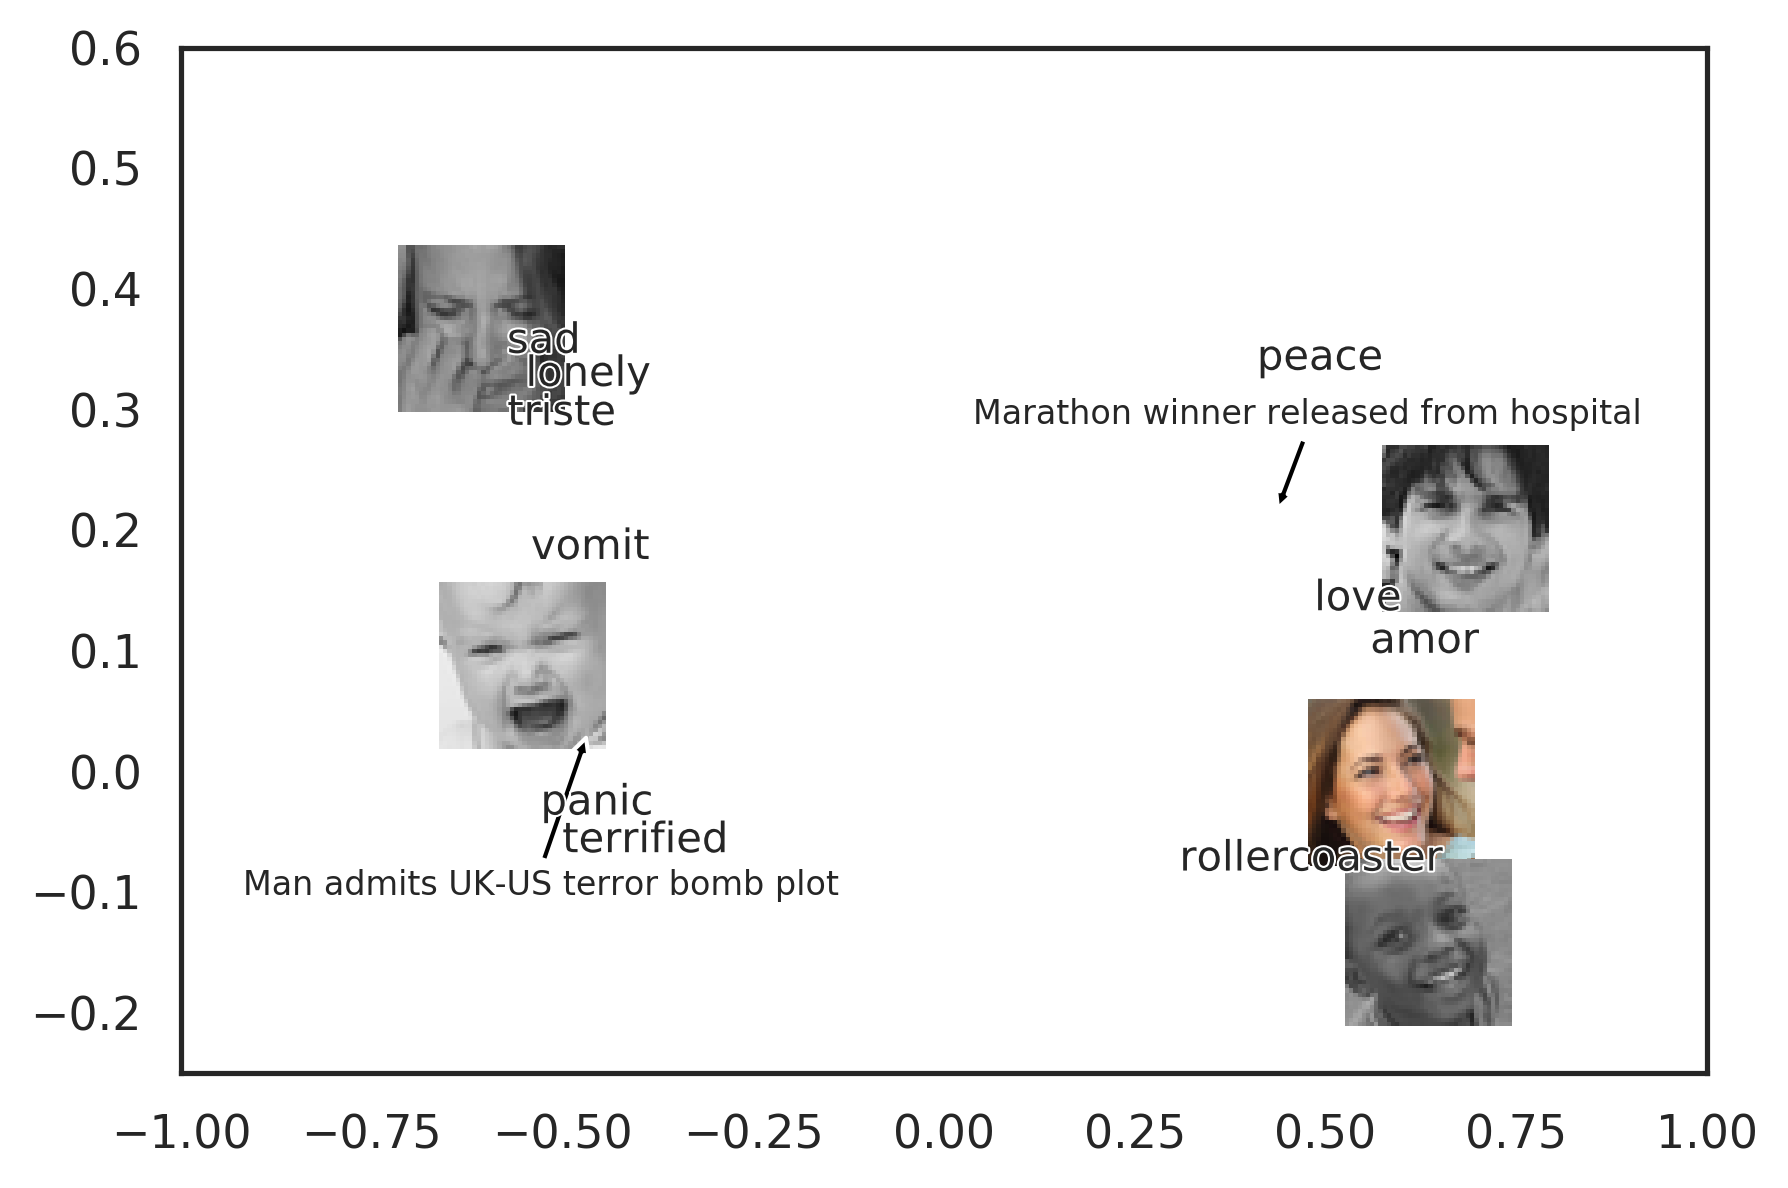

In [195]:
fig, ax = plt.subplots(dpi=300)

img_size = (40,40)


ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))

ax.set_xlim((-1, 1))
ax.set_ylim((-.25, .6))

samples = [ # (dataset, sample) or (dataset, sample, dx, dy)
    (words_en, "love"),
    #(words_en, "joy"),
    (words_en, "peace"),
    (words_en, "panic"),
    (words_en, "terrified"),
    (words_en, "vomit"),
    (words_en, "sad"),
    #(words_es, "aislado"),
    (words_es, "triste", 0.05, -0.01),
    (words_en, "lonely", 0, 0.01),
    #(words_en, "grief"),
    (words_en, "rollercoaster"),
    #(words_en, "thrill"),
    (words_es, "amor"),
    (images_affnet, 350),
    (images_fer, 29018), # happy child
    (images_fer, 30523), # sad young woman
    (images_fer, 30749), # happy young man
    #(images_fer, 29987), # happy young woman
    (images_fer, 29819),
    (texts_emobank, "Man admits UK-US terror bomb plot", -.45, -.13),
    (texts_emobank, "Marathon winner released from hospital", -.4, +.07),   
    #(words_en, "urine"),
    #(words_en, "vomit"),
    #(words_en, "love"),
    ##(words_es, "amor"),
    #(words_en, "rage"),
    #(words_en, "panic"),
    #(words_en, "grief"),
    ##(words_en, "tumor"),
    ##(words_en, "fatigued"),
    ##(words_es, "sol"),
    #(words_pl, "szczęśliwy"),
    #(words_en, "cozy"),
    #(words_es, "relajado"),
    #(words_es, "cansado"),
    #(words_es, "sueño"),
    ##(words_es, "abrazo"),
    ##(words_en,"relaxed"),
    #
    ##(words_en, "clock"),
    ##(words_en, "hairpin"),
    #(words_en, "chair"),
    #(images_affnet, 89),
    ##(images_affnet, 581), # Cameron content
    #(images_affnet, 145), # angry kid
    ##(images_affnet, 136),# young woman, slightly smiling
    ##(images_affnet, 177),
    #(images_affnet, 200), # sad looking young man
    ##(images_affnet, 144), # disgusted looking middle-aged man
    #(images_affnet, 259), # unhappy Kim-Yong Un
    ##(images_affnet, 313), really unhappy kid
    #(images_affnet, 318),
    #(images_affnet, 453),
    #(images_affnet, 620),
    ##(images_affnet, 351), #bill gates slightly happy,
    #(images_affnet, 692),
    #(images_affnet, 662), 
    #(images_affnet, 114), # Morgan Freeman amused
    #
    ### FER
    #(images_fer, 28987),
    #(images_fer, 28965),
    
]

for curr_sample in samples:
    if len(curr_sample) == 2:
        dataset, sample = curr_sample
        dx, dy = 0,0
    elif len(curr_sample) == 4:
        dataset, sample, dx, dy = curr_sample
    else:
        raise ValueError("Only accepting 2-tuples (dataset, sample) or 4-tuples (dataset, sample, dx, dy).")
    try:
        emb = dataset.loc[sample]
    except KeyError:
        raise ValueError(f"'{sample}' not present in dataset")
    emb = pca(normalize(emb))
    x,y = emb
    if any(candidate is dataset for candidate in [words_en, words_es, words_de, 
                                                  words_pl, words_tr]):
        ax.text(x=x+dx, y=y+dy, s=sample, zorder=99, fontsize=10,
                path_effects=[PathEffects.withStroke(linewidth=1, foreground="w")])
    elif any(candidate is dataset for candidate in  [texts_emobank, texts_afftext, texts_sst, texts_cvat]):
        #ax.scatter(x=x+dx, y=y+dy, zorder=99)
        ax.annotate(s=sample,xy=(x,y), xytext=(x+dx,y+dy),
                    arrowprops=dict(facecolor='black', 
                                    width=2,
                                    headwidth=4,
                                    headlength=4),
                   zorder=40)
    elif any(candidate is dataset for candidate in [images_fer, images_affnet]):
        if dataset is images_fer:
            img = ds_fer[id2index_fer[sample]]["features"]
        elif dataset is images_affnet:
            img = ds_an[id2index_an[sample]]["features"]
        else: 
            raise ValueError
        img = img.resize(img_size)
        imagebox = OffsetImage(img, zoom=1)
        x,y = pca(normalize(dataset.loc[sample]))
        ab = AnnotationBbox(imagebox, (x+dx,y+dy), frameon=False)
        ax.add_artist(ab)
    else:
        raise ValueError("Invalid dataset selected.")

fig.tight_layout()
fig.savefig("emotion-space.pdf")  

# Emotion-based Cross-Modal Retrieval

In [14]:
# combine everything into one df with multi-index
dfs = [words_en,words_es,words_de,words_pl,words_tr,texts_emobank,texts_afftext,texts_sst,texts_cvat,
       images_fer,images_affnet]
df_labels = ["words_en","words_es","words_de","words_pl","words_tr","texts_emobank","texts_afftext",
"texts_sst","texts_cvat","images_fer", "images_affnet"]
df_full = pd.concat(dfs, keys=df_labels)

# compute similiarity scores between all items, store in df with multi-indices in rows and columns
df_full = normalize(df_full)
df_similarity = df_full.dot(df_full.transpose())



In [15]:
df_similarity.xs(key="words_en", axis=1).xs(key="words_en", axis=0).loc["rollercoaster"].sort_values(ascending=False)[1:11]

infatuation    0.947329
fireworks      0.946485
lust           0.939258
thrill         0.938991
astonished     0.937814
excitement     0.937522
surprised      0.933256
ecstasy        0.928545
dazzle         0.924324
miracle        0.924276
Name: rollercoaster, dtype: float64

In [16]:
# retrieval function which takes source dataset, source sample and target dataset, 
#     returns ranking of target datasets samples
def get_most_similar(source, query, target, n=10):
    similarities = df_similarity.xs(key=source, axis=0).xs(key=target, axis=1).loc[query]
    sorted_list = similarities.sort_values(ascending=False)
    if n:
        return sorted_list[1:n+1]
    else:
        return sorted_list

In [ ]:
def get_image_series(dataset, series):
    
    print(series)
    
    im_width_inch = 1
    im_height_inch = 1
    
    n = len(series)
    ids = list(series.index)
    fig, axs = plt.subplots(nrows=1, 
                            ncols=n, 
                            dpi=300, 
                            figsize=(im_width_inch*1.5*n, im_height_inch),
                            gridspec_kw={"hspace":1, "wspace":.5})
    for i in range(n):
        sample = dataset[id2index_an[ids[i]]]
        ax = axs[i]
        ax.imshow(sample["features"])
        ax.set_title(sample["id"],pad=3, fontdict={"fontsize":8})
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())
    

    
    return fig

In [ ]:
def image_retrieval(source, query, target, n=10):
        
    if target == "images_affnet":
        dataset = ds_an
        idmap = id2index_an
    elif target == "images_fer":
        dataset = ds_fer
        idmap = id2index_fer
    else:
        raise ValueError(f"Unknow dataset: {target}")
    
    series = get_most_similar(source, query, target, n=n)
    

    
    print(series)
    
    im_width_inch = 1
    im_height_inch = 1
    
    n = len(series)
    ids = list(series.index)
    fig, axs = plt.subplots(nrows=1, 
                            ncols=n, 
                            dpi=300, 
                            figsize=(im_width_inch*1.1*n, im_height_inch),
                            gridspec_kw={"hspace":1, "wspace":.2})
    for i in range(n):
        sample = dataset[idmap[ids[i]]]
        ax = axs[i]
        ax.imshow(sample["features"])
        #ax.set_title(sample["id"],pad=3, fontdict={"fontsize":8})
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())
    
    
    return fig

### Example: Rollercoaster

In [ ]:
get_most_similar("words_en", "rollercoaster", "words_en")

In [ ]:
get_most_similar("words_en", "rollercoaster", "words_es")

In [ ]:
get_most_similar("words_en", "rollercoaster", "texts_afftext")

In [ ]:
image_retrieval("words_en", "rollercoaster", "images_fer", n=3)

# Example Urine

In [ ]:
get_most_similar("words_en", "urine", "words_en")

In [ ]:
get_most_similar("words_en", "urine", "words_es")

In [ ]:
get_most_similar("words_en", "urine", "texts_afftext")

In [ ]:
image_retrieval("words_en", "urine","images_fer", n=3)

### Examples: Lonely

In [ ]:
get_most_similar("words_en", "lonely", "words_en")

In [ ]:
get_most_similar("words_en", "lonely", "words_es")

In [ ]:
get_most_similar("words_en", "lonely", "texts_afftext")

In [ ]:
image_retrieval("words_en", "lonely", "images_fer", n=3)

# Example: terrified

In [ ]:
get_most_similar("words_en", "terrified", "words_en")

In [ ]:
get_most_similar("words_en", "terrified", "words_es")

In [ ]:
get_most_similar("words_en", "terrified", "texts_afftext")

In [ ]:
image_retrieval("words_en", "terrified", "images_fer", n=3)

### Example: rage

In [ ]:
get_most_similar("words_en", "rage", "words_en")

In [ ]:
get_most_similar("words_en", "rage", "words_es")

In [ ]:
get_most_similar("words_en", "rage", "texts_afftext")

In [ ]:
image_retrieval("words_en","rage", "images_fer", n=3)

### Examples: Surprise

In [ ]:
get_most_similar("words_en", "surprised", "words_en")

In [ ]:
get_most_similar("words_en", "surprised", "words_es")

In [ ]:
get_most_similar("words_en", "surprised", "texts_emobank")

In [ ]:
image_retrieval("words_en", "surprised", "images_fer")

### Examples: Pencil

In [ ]:
get_most_similar("words_en", "pencil", "words_en")

In [ ]:
get_most_similar("words_en", "pencil", "words_es")

In [ ]:
get_most_similar("words_en", "pencil", "texts_emobank")

In [ ]:
image_retrieval("words_en", "pencil", "images_affnet")

---